In [1]:
# Function to extract the block index from the block ID string
def extract_block_index(block_id):
    return int(block_id.split('_')[-1])

# Test the function
sample_block_ids = ["1_2_12", "1_2_123", "1_2_1234"]
block_indexes = [extract_block_index(id) for id in sample_block_ids]
block_indexes

[12, 123, 1234]

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def extract_block_index(block_id):
    return int(block_id.split('_')[-1])
    
def create_latency_plots(df, window_size=20, marker_size=50, GTnumber=-1):
    sns.set(font_scale=1.5)

    # Calculate the rolling average for each unique path (combination of Source and Destination)
    df['Path'] = df['Source'].astype(str) + ' -> ' + df['Destination'].astype(str)
    df['Latency_Rolling_Avg'] = df.groupby('Path')['Latency'].transform(lambda x: x.rolling(window=window_size).mean())
    
    # Metrics for x-axis
    # metrics = ['Arrival Time', 'Block Index', 'Creation Time']
    metrics = ['Arrival Time', 'Creation Time']

    # Create subplots
    fig, axes = plt.subplots(len(metrics), 2, figsize=(18, 18))
    
    for i, metric in enumerate(metrics):
        # Line Plots on the left (column index 0)
        sns.lineplot(x=metric, y='Latency_Rolling_Avg', hue='Path', ax=axes[i, 0], data=df, legend=False)
        axes[i, 0].set_title(f'Latency Trends Over {metric} (Window Size = {window_size})')
        axes[i, 0].set_xlabel(metric)
        axes[i, 0].set_ylabel('Latency (Rolling Average)')
        
        # Scatter Plots on the right (column index 1)
        sns.scatterplot(x=metric, y='Latency', hue='Path', ax=axes[i, 1], data=df, marker='o', s=marker_size, legend=False)
        axes[i, 1].set_title(f'Individual Latency Points Over {metric}')
        axes[i, 1].set_xlabel(metric)
        axes[i, 1].set_ylabel('Latency')
        
    # Adjust the layout
    plt.tight_layout()
    # plt.savefig(outputPath + '/pngAllLatencies/' + '{}_gateways_All_Latencies_subplots.png'.format(GTnumber), dpi = 300)
    plt.show()
    plt.close()
    sns.set(font_scale=1.0)


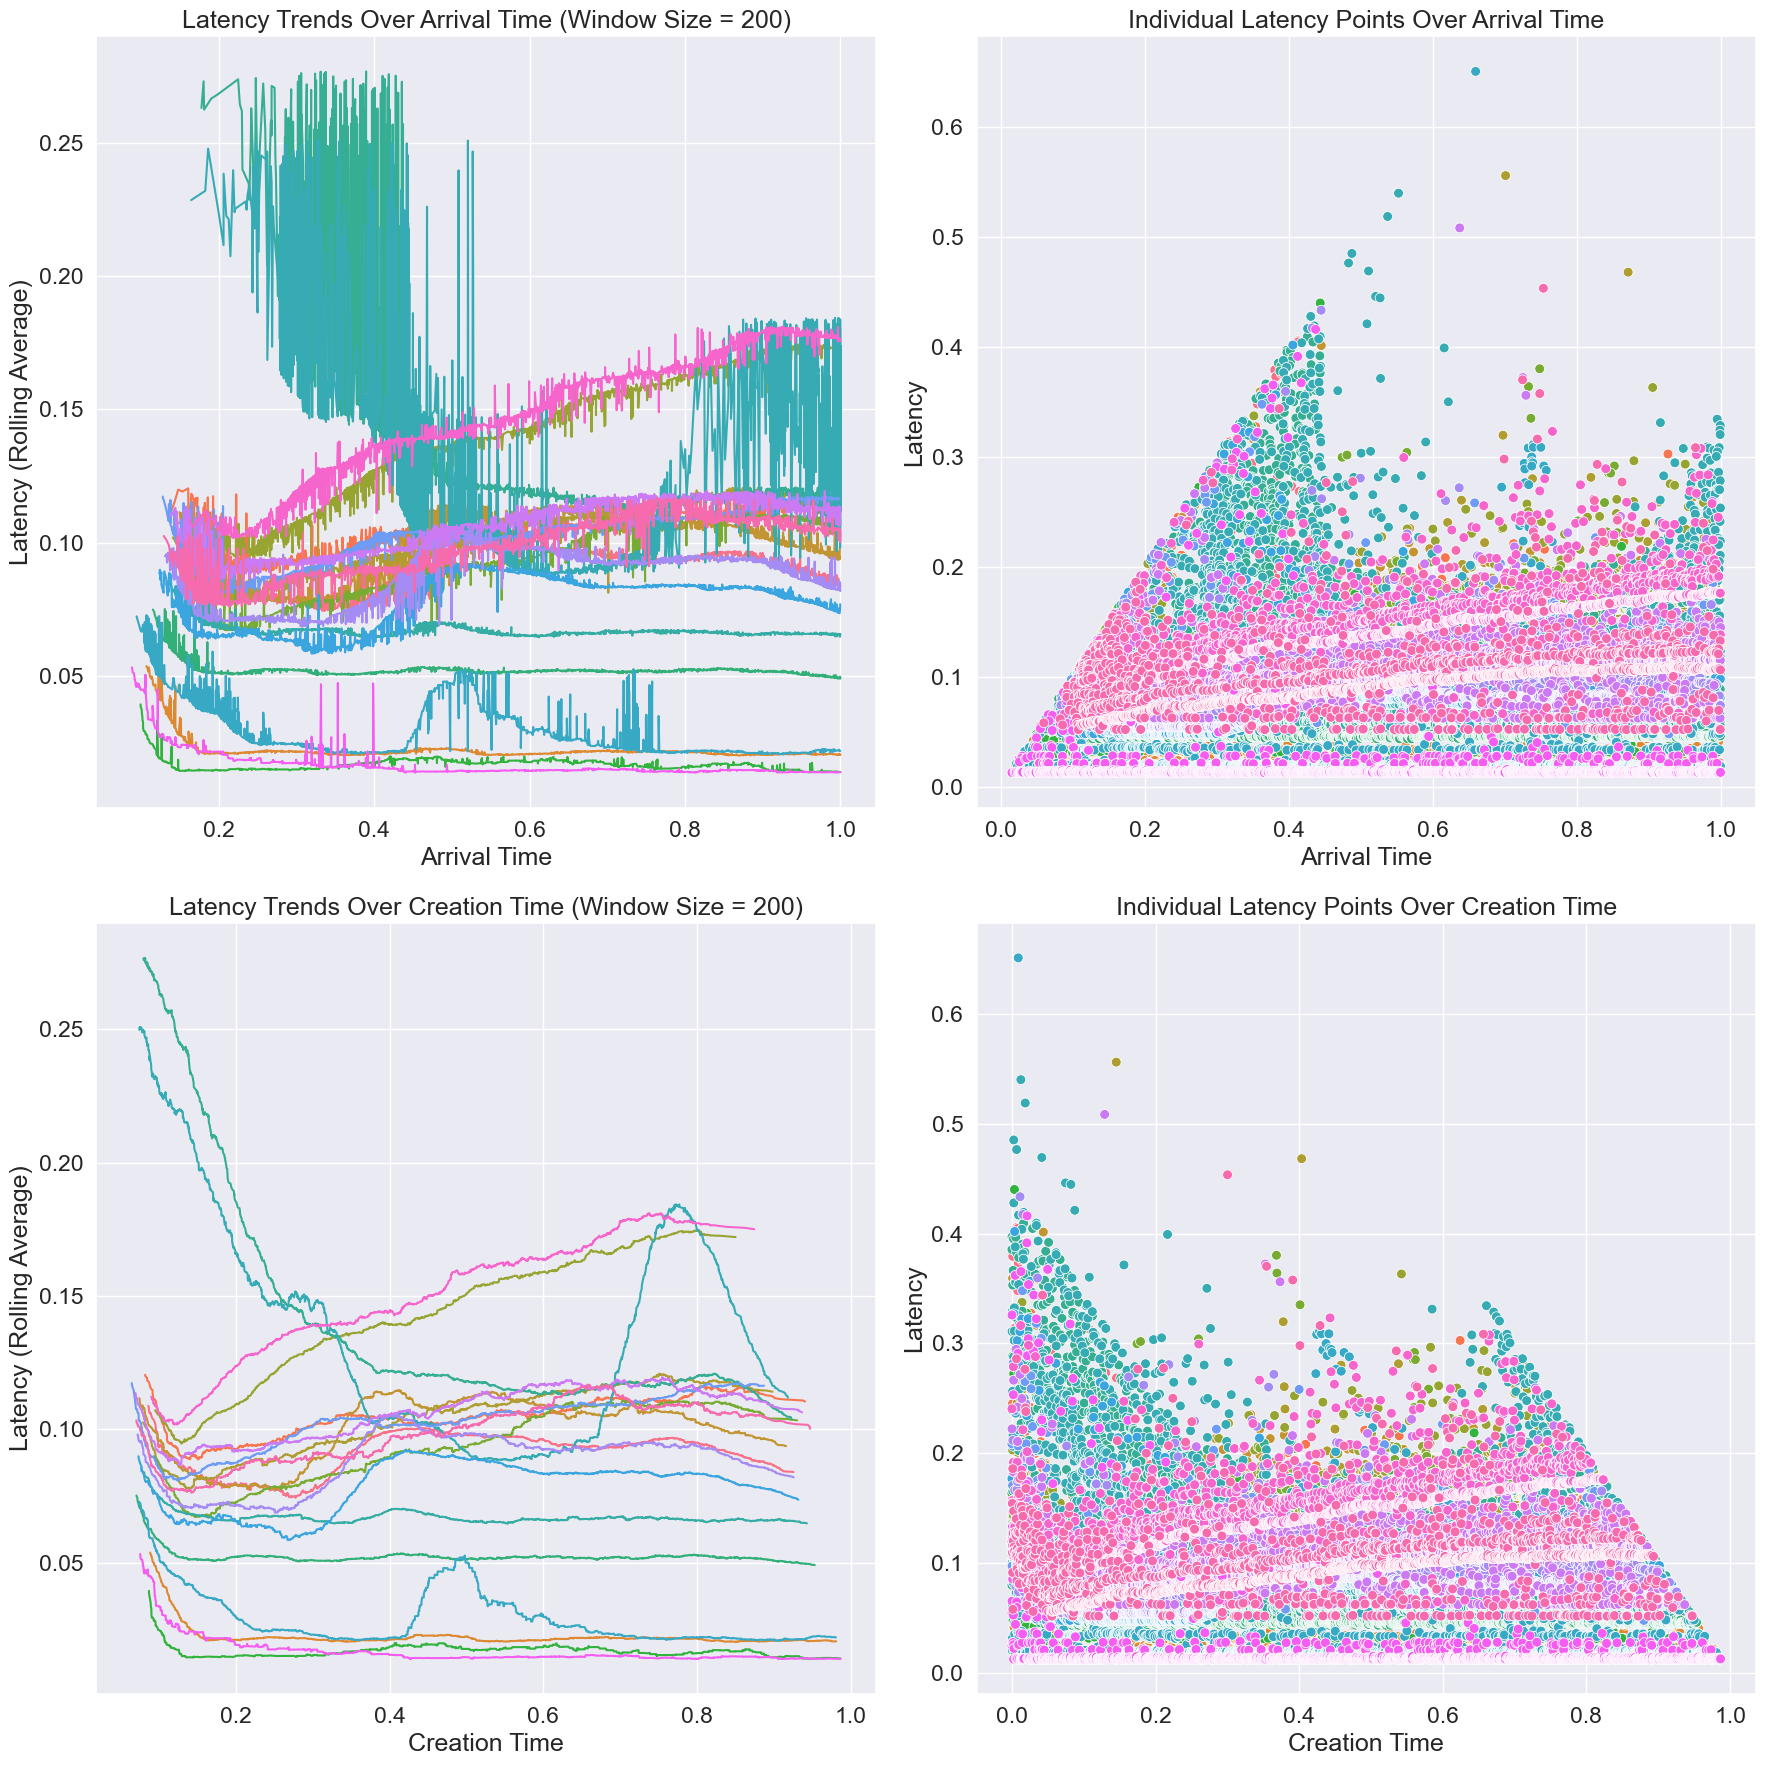

,Unnamed: 0,Creation Time,Latency,Arrival Time,Source,Destination,Block ID,Block Index
0,1712,0.000000,0.119114,0.119114,"Aalborg, Denmark","Cordoba, Argentina (partner station)",2_3_0,0
1,2984,0.000221,0.140886,0.141107,"Aalborg, Denmark","Cordoba, Argentina (partner station)",2_3_1,1
2,619,0.000228,0.096188,0.096417,"Aalborg, Denmark","Cordoba, Argentina (partner station)",2_3_2,2
3,3277,0.000793,0.145171,0.145963,"Aalborg, Denmark","Cordoba, Argentina (partner station)",2_3_3,3
4,2933,0.000813,0.139345,0.140159,"Aalborg, Denmark","Cordoba, Argentina (partner station)",2_3_4,4
...,...,...,...,...,...,...,...,...
46407,46267,0.944458,0.053091,0.997548,"Tolhuin, Argentina (partner station)","Malaga, Spain",4_0_2578,2578
46408,46271,0.945502,0.052112,0.997613,"Tolhuin, Argentina (partner station)","Malaga, Spain",4_0_2579,2579
46409,46335,0.946698,0.052228,0.998925,"Tolhuin, Argentina (partner station)","Malaga, Spain",4_0_2585,2585
46410,46338,0.946918,0.052059,0.998977,"Tolhuin, Argentina (partner station)","Malaga, Spain",4_0_2586,2586


In [13]:
# Read the newly uploaded CSV file into a raw DataFrame
df_raw = pd.read_csv('./allLatencies_5_gateways.csv')

# remove aalborg
# df_raw = df_raw[(df_raw['Source'] != 'Aalborg, Denmark') & (df_raw['Destination'] != 'Aalborg, Denmark')]

# Extract the data block index from the Block ID in the raw DataFrame
df_raw['Block Index'] = df_raw['Block ID'].apply(extract_block_index)

# Sort the DataFrame by paths (Source and Destination)
df_sorted_by_paths_raw = df_raw.sort_values(by=['Source', 'Destination', 'Block Index'])

# Test the updated function on the raw DataFrame with a window size of 20
create_latency_plots(df_sorted_by_paths_raw, window_size=200)

df_raw


In [7]:
!dir

 El volumen de la unidad T es DATOS
 El n�mero de serie del volumen es: 6648-9550

 Directorio de t:\Fede\SatNEx_code\tests

17/10/2023  10:17    <DIR>          .
17/10/2023  10:17    <DIR>          ..
09/10/2023  17:39             5.684 allLatencies_2gateways.csv
13/10/2023  03:59         1.806.350 allLatencies_3_gateways.csv
17/10/2023  10:19            15.309 becaria.ipynb
10/10/2023  14:41               124 logfile.log
               4 archivos      1.827.467 bytes
               2 dirs  168.024.330.240 bytes libres
